# Data cleaning

## Columns explanation
Status: Developed or Developing status  
Life expectancy: Life Expectancy in age  
Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)  
infant deaths: Number of Infant Deaths per 1000 population  
Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)  
percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)  
Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)  
Measles: Measles - number of reported cases per 1000 population  
BMI: Average Body Mass Index of entire population  
under-five deaths: Number of under-five deaths per 1000 population  
Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)  
Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)  
Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)  
HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)  
GDP: Gross Domestic Product per capita (in USD)  
Population: Population of the country  
thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )  
thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)  
Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)  
Schooling: Number of years of Schooling(years)  

## Import and load csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from numpy.random import exponential
import random
import scipy.stats as stats
import math
import numpy as np
from sklearn import preprocessing
import pickle

## Load csv

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

## Show columns and remove spaces in names

In [3]:
df.shape

(2938, 22)

In [4]:
# Rename columns to remove spaces
for col in df.columns:
    df.rename(columns={col: col.strip()}, inplace=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# Drop status columns, wont we used
df.drop(columns=['Status'], inplace=True)
df.columns

Index(['Country', 'Year', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Show the first rows of the dataframe

## NAs values with distributions
Fill NAs values in the dataframe where the columns have different probability distributions.  

General idea:  
1. Show histogram of the column.
2. See if the shown histogram has the shape of a known distribution such as normal, exponential, truncated normal, etc.
3. If the histogram has the shape of a distribution, then simulate that distribution and fill na's in that column selecting randomly a value.  
4. Show histogram of the column and the simulated distribution, to see if the selection makes sense.

In [6]:
#see NAs values
print(df.shape)
df.isnull().sum()

(2938, 21)


Country                              0
Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In case that the data contains missing values decisions need to be made. This can be by for example, removing those cases, filling with some default value or with the mean/average. 

In [7]:
def show_hist_of_arrays(original, simulated):
    n_bins = 10
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].hist(original, bins=n_bins)
    axs[0].set_title('original')
    axs[1].hist(simulated, bins=n_bins)
    axs[1].set_title('simulated')
    plt.show()

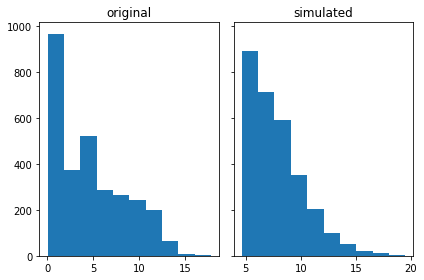

In [8]:
#plt.hist(df['Alcohol'])
# Alcohol hist has truncated normal dist
lower, upper = df['Alcohol'].min(), df['Alcohol'].max()
mu, sigma = df['Alcohol'].mean(), df['Alcohol'].std()
a = (lower - mu) / sigma
s_n = np.random.normal(mu, sigma, df['Alcohol'].shape[0])
X = stats.truncnorm(lower, np.inf, loc=mu, scale=sigma).rvs(len(df['Alcohol']))

# fill alcohol with random values of X
df.fillna({'Alcohol': random.choice(X)}, inplace=True)

df.isnull().sum()
show_hist_of_arrays(df['Alcohol'], X)


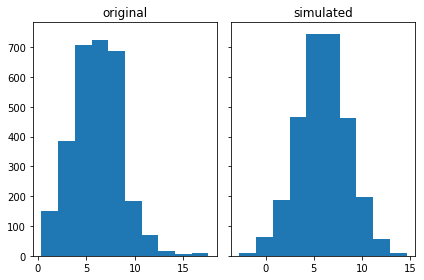

In [9]:
# Total expenditure
#plt.hist(df['Total expenditure'])
# Total expenditure has normal dist
mu, sigma = df['Total expenditure'].mean(), df['Total expenditure'].std() # mean and standard deviation
s_n = np.random.normal(mu, sigma, df['Total expenditure'].shape[0])

# Fill
df.fillna({'Total expenditure': random.choice(s_n)}, inplace=True)

df.isnull().sum()
show_hist_of_arrays(df['Total expenditure'], s_n)

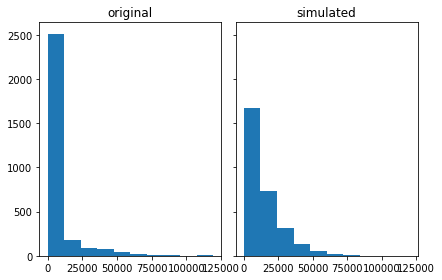

In [10]:
#plt.hist(df['GDP'])

# GDP has exponential dist
exp_data = stats.expon.rvs(scale=df['GDP'].std(), size=df['GDP'].shape[0])

# Fill 
df.fillna({'GDP': random.choice(exp_data)}, inplace=True)

df.isnull().sum()

show_hist_of_arrays(df['GDP'], exp_data)

Show the different values for the variable COUNTRY

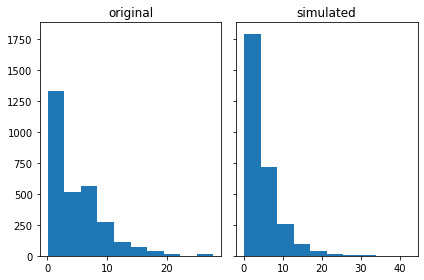

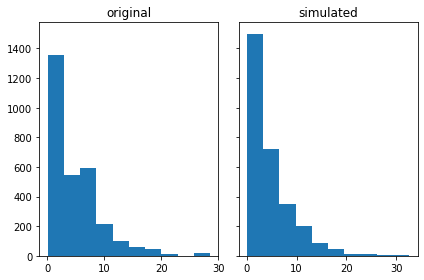

Country                              0
Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                         652
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
# thinness  1-19 years and thinness 5-9 years have exponential
#plt.hist(df['thinness  1-19 years'])
#plt.hist(df['thinness 5-9 years'])

# GDP has exponential dist
for col in ['thinness  1-19 years', 'thinness 5-9 years']:
    exp_data = stats.expon.rvs(scale=df[col].std(), size=df[col].shape[0])
    # Fill 
    df.fillna({col: random.choice(exp_data)}, inplace=True)
    # Show
    show_hist_of_arrays(df[col], exp_data)

df.isnull().sum()

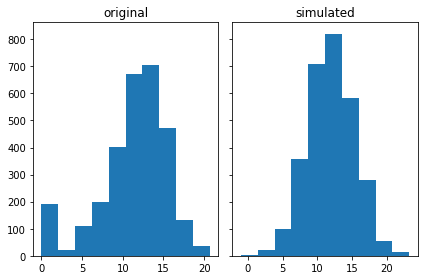

Country                              0
Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                         652
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    167
Schooling                            0
dtype: int64

In [12]:
#plt.hist(df['Schooling'])

# Total expenditure has normal dist
mu, sigma = df['Schooling'].mean(), df['Schooling'].std() # mean and standard deviation
s_n = np.random.normal(mu, sigma, df['Schooling'].shape[0])

# Fill 
df.fillna({'Schooling': random.choice(exp_data)}, inplace=True)

show_hist_of_arrays(df['Schooling'], s_n)

df.isnull().sum()


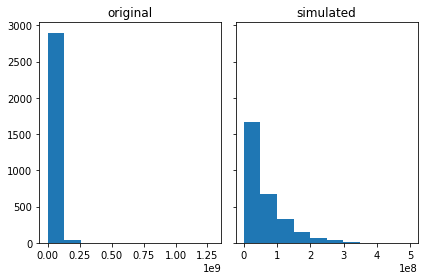

In [13]:
#plt.hist(df['Population'])
exp_data = stats.expon.rvs(scale=df['Population'].std(), size=df['Population'].shape[0])
df.fillna({'Population': random.choice(exp_data)}, inplace=True)
df.isnull().sum()
show_hist_of_arrays(df['Population'], exp_data)


# NAs values without distribution

In [14]:
#Remove rows with Life expectancy or Adult Mortality with nulls because they are only 10 from 2938
df.dropna(subset=['Life expectancy', 'Adult Mortality',], inplace=True)
print(df.shape)
df.isnull().sum()

(2928, 21)


Country                              0
Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    160
Schooling                            0
dtype: int64

In [15]:
def get_random_range(ranges_list, probs):
    return random.choices(
        population=ranges_list,
        weights=probs
    )[0]


def fill_nas_with_random_range(df, col, ranges_list, probs):
    for i, _ in df.iterrows():
        value = df.loc[i, col]
        if value is None or np.isnan(value):
            random_range = get_random_range(ranges_list, probs)
            df.loc[i, col] = random.choice(random_range)
    return df

/Users/brunomichetti/work/ml-workshop/env-ml/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/brunomichetti/work/ml-workshop/env-ml/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Country                              0
Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    160
Schooling                            0
dtype: int64

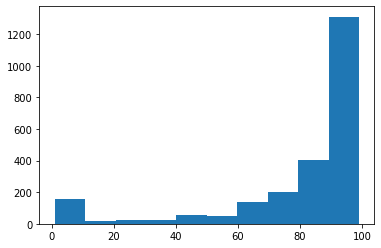

In [16]:
# See hist
plt.hist(df['Hepatitis B'])

# Simulate ranges
ranges_list = [
    range(1,10),
    range(10, 60),
    range(60, 70),
    range(80, 90),
    range(90, 100)
]
probs = [0.1, 0.05, 0.1, 0.2, 0.55]

df = fill_nas_with_random_range(df, 'Hepatitis B', ranges_list, probs)    
df.isnull().sum()

Country                              0
Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    160
Schooling                            0
dtype: int64

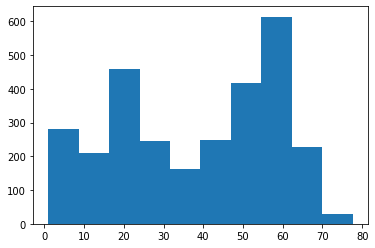

In [17]:
plt.hist(df['BMI'])

df['BMI'].fillna(df['BMI'].mean(), inplace=True)

df.isnull().sum()

Country                              0
Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    160
Schooling                            0
dtype: int64

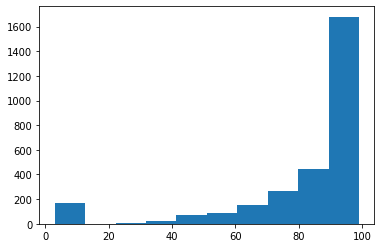

In [18]:
plt.hist(df['Polio'])

# Simulate ranges
ranges_list = [
    range(1,10),
    range(10, 40),
    range(40, 60),
    range(60, 70),
    range(70, 80),
    range(80, 90),
    range(90, 100)
]
probs = [0.05, 0.02, 0.03, 0.05, 0.1, 0.2, 0.55]

df = fill_nas_with_random_range(df, 'Polio', ranges_list, probs)    
df.isnull().sum()

Country                              0
Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    160
Schooling                            0
dtype: int64

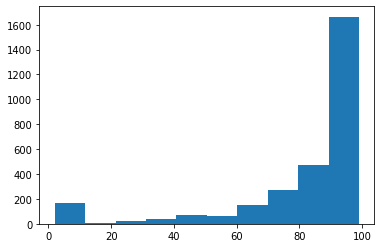

In [19]:
plt.hist(df['Diphtheria'])

# Simulate ranges
ranges_list = [
    range(1,10),
    range(10, 40),
    range(40, 60),
    range(60, 70),
    range(70, 80),
    range(80, 90),
    range(90, 100)
]
probs = [0.05, 0.02, 0.03, 0.05, 0.1, 0.2, 0.55]

df = fill_nas_with_random_range(df, 'Diphtheria', ranges_list, probs)    
df.isnull().sum()

Country                            0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

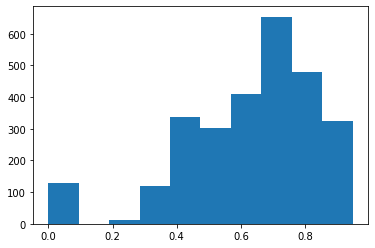

In [20]:
plt.hist(df['Income composition of resources'])

df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace=True)

df.isnull().sum()

## Hot-encoding for countries

In [21]:
df = pd.get_dummies(df, prefix='Country', prefix_sep='-', columns=['Country'])

df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country-United Republic of Tanzania,Country-United States of America,Country-Uruguay,Country-Uzbekistan,Country-Vanuatu,Country-Venezuela (Bolivarian Republic of),Country-Viet Nam,Country-Yemen,Country-Zambia,Country-Zimbabwe
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,0


# Save result
Now, save the cleaned data and the normalized data. 

In [22]:
df.to_csv('cleaned_csv.csv', index=False)